In [1]:
%matplotlib inline

In [2]:
from IPython.display import YouTubeVideo, Image

# Problem Set 2

## Directions

1. Show all work/steps/calculations. Your submission should be a zip file named according to your JHED id ` <JHED>.zip` with the following contents:
    1. the .ipynb version of the notebook.
    2. the database, `contracts.db`
    3. the DDL file, `contracts.sql`
    3. your ETL code as `contracts.py`
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results. Explain your decisions.**
4. Please level all the top level Markdown headers in place.


---



## Section 1 - Bad Charts

### Chart 1

Based on the principles discussed in the Visualization Module and the Rules presented, answer each question regarding the following chart:

![chart1](http://skepchick.org/wp-content/uploads/2015/06/CNN-weed-chart.jpg)

### Question 1.1 

What do you think the main message or story of the chart is?

I think the main message of this chart is the percentage of americans who have tried weed in each age group. That is to say, 36% of americans between 18-29 have tried weed, and so on. 

### Question 1.2

What are the chief problems with the following chart (what visualization principles does it violate)?

 - It attempts to use a version of a pie chart, which could be replaced by a bar chart
 - It does not follow the conventions of pie charts
 - The data it represents is not actually a whole, but four different distrubtions. We can tell this because the percentages do not add up to 100%.
 - It uses color unnecessarily

### Question 1.3

Present an alternative and describe why it is better (what visualization principles does your version follow)?

An alternative would be a simple, mono-color bar chart, with each age group along one axis, and the percent that have tried weed in that age group along the other axis. This follows the principle of not using pie charts, not using unnecessary colors, and it won't be misleading the reader in terms of what the data is actually saying. 

In [3]:
import pandas as pd

In [4]:
weed = pd.DataFrame(
    {
        "Age_group":["18-29","30-49","50-64","65+"],
        "Percent":[36,49,44,17]
    }
)
weed

,Age_group,Percent
0,18-29,36
1,30-49,49
2,50-64,44
3,65+,17


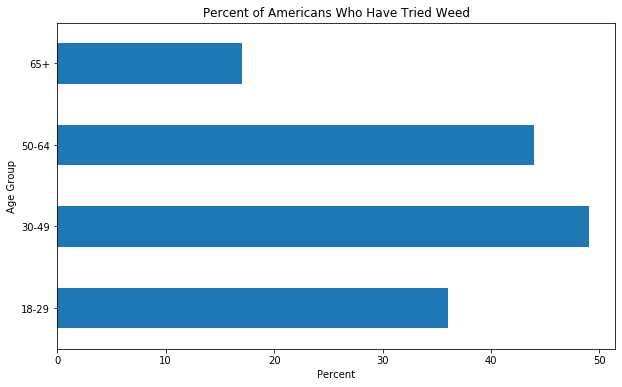

In [5]:
ax = weed.plot.barh(x = "Age_group", figsize = (10,6))
ax.set_xlabel("Percent")
ax.set_ylabel("Age Group")
ax.set_title("Percent of Americans Who Have Tried Weed")
ax.get_legend().remove()

Now the chart tells the story much more clearly. Each bar clearly represents the percent of Americans in that bin who have tried weed. It is clear that the younger three age groups have all tried weed at at least double the rate of the 65+ group.


---

### Chart 2

Based on the principles discussed in the Visualization Module and the Rules presented, answer each question regarding the following chart:

![chart2](http://www.essexrecordofficeblog.co.uk/wp-content/uploads/2015/01/Death-pie-chart.jpg)

### Question 1.4 

What are the chief problems with the above chart (what visualization principles does it violate)?

- It is a pie chart. A bar chart is always a better alternative
- One of the numbers is -1%, which makes no sense at all
- Some color blind issues with green and red next to each other

### Question 1.5

Present an alternative(s). Make whatever assumptions you need to make but explain them.

A good alternative would be a bar chart. This would allow for a mono-colored chart, with easier to decode comparisons.

In [6]:
ages_dict = {
    "0-9":41, 
    "10-19":5,
    "20-29":13,
    "30-39":8,
    "40-49":4,
    "50-59":6,
    "60-69":5,
    "70-79":10,
    "80-89":8,
    "90-99":1,
}
ages = pd.DataFrame(
    {
        "age_group":list(ages_dict.keys()),
        "percent_of_deaths":list(ages_dict.values()),
    }
)
ages

,age_group,percent_of_deaths
0,0-9,41
1,10-19,5
2,20-29,13
3,30-39,8
4,40-49,4
5,50-59,6
6,60-69,5
7,70-79,10
8,80-89,8
9,90-99,1


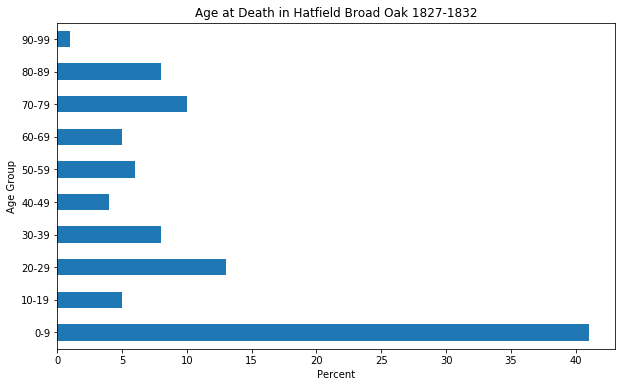

In [7]:
ax = ages.plot.barh(x = "age_group", figsize = (10, 6))
ax.set_xlabel("Percent")
ax.set_ylabel("Age Group")
ax.set_title("Age at Death in Hatfield Broad Oak 1827-1832")
ax.get_legend().remove()

This chart shows the distrubtion of deaths by age group much more clearly. But we can add another plot to make this chart even more informative.

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'By Percent of Deaths')

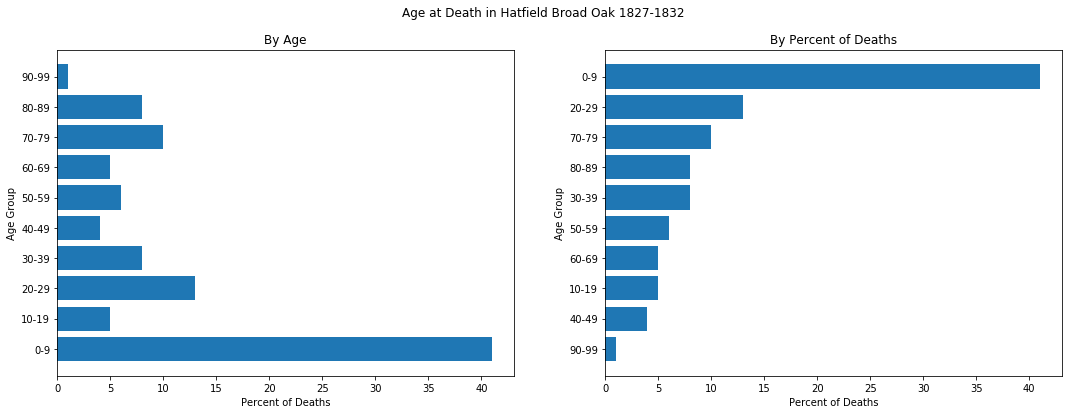

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Age at Death in Hatfield Broad Oak 1827-1832")

ax1.barh(ages.age_group, ages.percent_of_deaths)
ax1.set_xlabel("Percent of Deaths")
ax1.set_ylabel("Age Group")
ax1.set_title("By Age")

by_pct = ages.sort_values("percent_of_deaths")
ax2.barh(by_pct.age_group, by_pct.percent_of_deaths)
ax2.set_xlabel("Percent of Deaths")
ax2.set_ylabel("Age Group")
ax2.set_title("By Percent of Deaths")

This set of two subplots gives us two ways of viewing the data:
1. Percent of deaths from youngest to oldest
1. Percent of deaths by largest percent to smallest

One thing that might be an issue, is the potential to accidentally interpret these probabilities incorrectly. These are the probabilities of being in a given age group, given that the person is dead. However, they might be interpreted as a person's probability of dying given their age group, or the joint probability: being in a certain age group and being dead. To properly clarify this, an explanation could be given (as is given here), or by writing $P(age|dead)$ on the plots themselves.



---



## Section 2 - Obtaining and Querying Data

In Lab 4, we obtained data from a Wikipedia page. This time we're going to start with a Wikipedia page but obtain and transform the supporting data.

**DIRECTIONS:**

1. View [Top 100 Contractors of the U.S. federal government](https://en.wikipedia.org/wiki/Top_100_Contractors_of_the_U.S._federal_government).
2. If you follow footnote 6, you can obtain the raw data for FY2015 which is an Excel file. The Excel file is divided into tabs. The first tab covers all the Federal government while the remaining tabs cover departments and sub-departments. **We are only interested in departments** which means we don't want spending from the first tab (although you may want the contractor information) and we don't want sub-departments. A department will have a code that ends with "00". For example, "9700" is the Defense Department but "9761" is "Defense Threat Reduction". We're not interested in the latter.
3. Create a SQLite3 database, `contracts.db`, of the department specific actions (contracts) and dollar amounts. It should have **two** tables. The first, `contractors`, should have an id (as a primary key) and a global_vendor_name (as a varchar). The second, `actions`, should include an id (primary key), department, actions (number of actions), dollars (dollars obligated) and contractor_id as a foreign key to the contractors table. Follow the same pattern as in the Lab. All your database and table creation (DDL) commands will be in `contracts.sql`.
4. Reading the Excel file and creating the database should be automated with no cutting and pasting so that you could regenerate the database for a corrected file or for FY2016 (assuming it had the same format). Both `xlrd` and `openpyxl` are included in Anaconda. (Translating the file from .xls to .xlsx *is* permitted but may not be required). Place this "ETL" code in a separate `contracts.py` file and include it with your submission.
5. After generating the database, connect to it and answer the 3 questions:

In [10]:
import sqlite3

In [11]:
conn = sqlite3.connect("contracts.db")
cursor = conn.cursor()

### Question 2.1

What are the total actions and dollars obligated by department?



In [12]:
cursor.execute("SELECT department, sum(actions), sum(dollars) FROM actions GROUP BY department ORDER BY dollars, actions")
totals_by_deparment = cursor.fetchall()
totals_by_deparment = pd.DataFrame(totals_by_deparment, columns=["department", "actions","dollars"])
totals_by_deparment

,department,actions,dollars
0,EPA (6800),9115,1.128402e+09
1,Interior (1400),8420,2.100327e+09
2,Housing & Urban Dev (8600),1084,1.204730e+09
3,Commerce (1300),5857,2.115698e+09
4,Education (9100),1844,2.567376e+09
5,Labor (1600),2429,1.755931e+09
6,Agriculture (1200),9621,3.652094e+09
7,Justice (1500),47224,5.053252e+09
8,State (1900),10355,6.216252e+09
9,(GSA) 4700,47825,5.961147e+09


Text(0.5, 1.0, 'Total Actions')

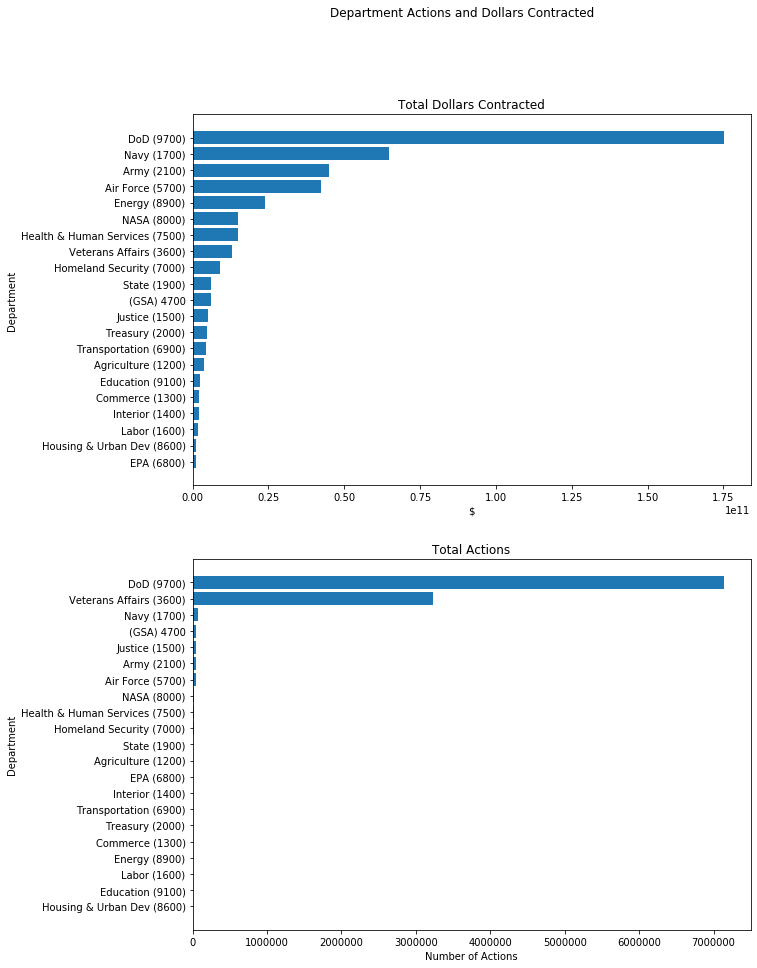

In [13]:
by_money = totals_by_deparment.sort_values("dollars")
by_actions = totals_by_deparment.sort_values("actions")

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
fig.suptitle("Department Actions and Dollars Contracted")

ax1.barh(by_money.department, by_money.dollars)
ax1.set_xlabel("$")
ax1.set_ylabel("Department")
ax1.set_title("Total Dollars Contracted")

by_pct = ages.sort_values("percent_of_deaths")
ax2.barh(by_actions.department, by_actions.actions)
ax2.set_xlabel("Number of Actions")
ax2.set_ylabel("Department")
ax2.set_title("Total Actions")

Clearly, the US spends much more on the military than on any other department.

### Question 2.2

What is Johns Hopkins University's number of actions and dollars by department?

In [14]:
# Get JHU's contractor_id from the contractors table
cursor.execute("SELECT contractor_id FROM contractors WHERE global_vendor_name='JOHNS HOPKINS UNIVERSITY'")
jhu_id = cursor.fetchall()[0]
jhu_id

(663,)

In [15]:
# Get JHU's actions and dollars by department
cursor.execute("SELECT department, actions, dollars FROM actions WHERE contractor_id=?", jhu_id)
jhu_contracts = cursor.fetchall()
jhu_contracts = pd.DataFrame(
    jhu_contracts, columns=["department", "actions", "dollars"]
).sort_values(["dollars", "actions"], ascending=False)
jhu_contracts

,department,actions,dollars
3,DoD (9700),1536,7.610237e+08
0,Navy (1700),959,5.494998e+08
2,NASA (8000),425,2.140475e+08
1,Health & Human Services (7500),238,3.896801e+07


Text(0.5, 1.0, 'Total Actions')

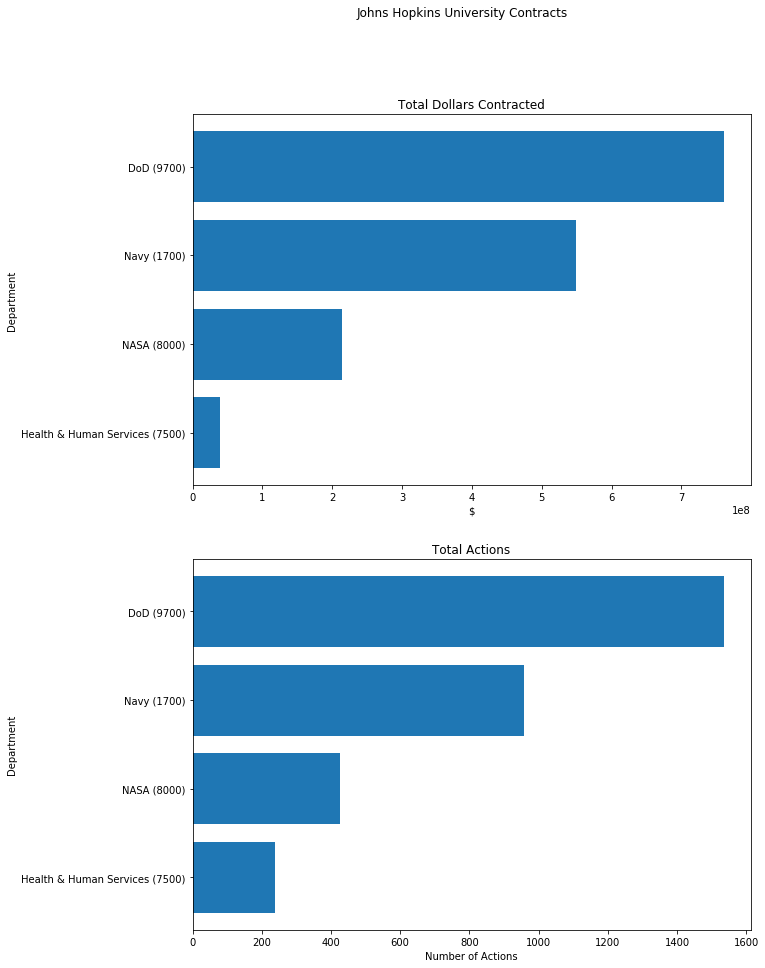

In [16]:
by_money = jhu_contracts.sort_values("dollars")
by_actions = jhu_contracts.sort_values("actions")

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
fig.suptitle("Johns Hopkins University Contracts")

ax1.barh(by_money.department, by_money.dollars)
ax1.set_xlabel("$")
ax1.set_ylabel("Department")
ax1.set_title("Total Dollars Contracted")

by_pct = ages.sort_values("percent_of_deaths")
ax2.barh(by_actions.department, by_actions.actions)
ax2.set_xlabel("Number of Actions")
ax2.set_ylabel("Department")
ax2.set_title("Total Actions")

From these graphs, it is very clear that JHU does a huge amount of work for the Federal US Government, and in particular for the DoD and the Navy. 


### Question 2.3

Determine how many vendors received contracts from 1 department, 2 departments, etc. In other words, I want a table that looks like the following (numbers are absolutely made up):

| # Departments | Vendors |
|-------------|-----------|
| 1           | 1238      |
| 2           | 525       |
| 3           | 275       |
| ...         |           |
| n           | 2         |

Interpret the first two rows in words. What is the overall story? Now, using *percentages* (instead of these raw counts), make a chart that shows this story using the principles explored in class.

In [17]:
cursor.execute("SELECT count(department) FROM actions GROUP BY contractor_id")
num_dep_count = cursor.fetchall()
num_dep_count = pd.DataFrame(num_dep_count, columns=["num_departments"])
num_dep_count

,num_departments
0,1
1,1
2,1
3,1
4,4
...,...
1367,1
1368,1
1369,1
1370,1


In [18]:
(
    num_dep_count.num_departments.value_counts()
    .reset_index()
    .rename(columns={"index": "# Departments", "num_departments": "Vendors"})
    .sort_values("# Departments")
)

,# Departments,Vendors
0,1,1120
1,2,122
2,3,44
3,4,26
4,5,13
5,6,11
7,7,8
6,8,9
11,9,2
8,10,4


The first two rows of the table tell us that by far, the vast majority of vendors only contract with for one department.

In [19]:
dep_count_final = (
    num_dep_count.num_departments.value_counts(normalize=True)
    .reset_index()
    .rename(columns={"index": "# Departments", "num_departments": "Vendors"})
    .sort_values("# Departments")
)

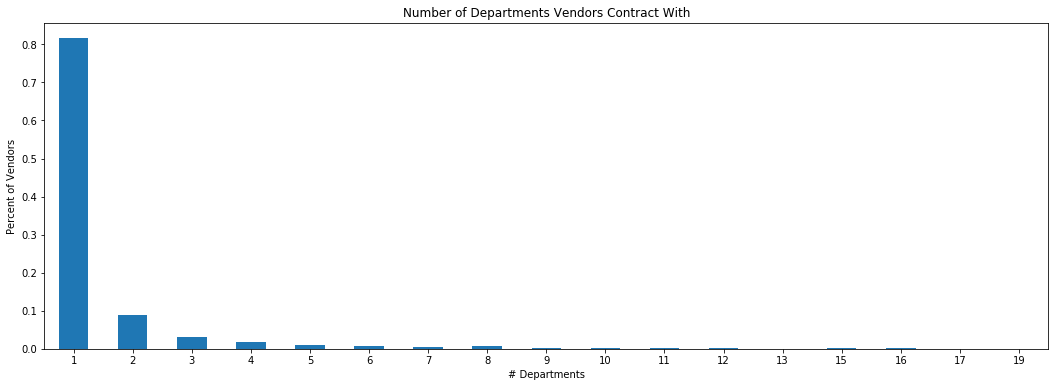

In [20]:
ax = dep_count_final.plot.bar(x = "# Departments", figsize = (18, 6), rot=0)
ax.set_ylabel("Percent of Vendors")
ax.set_title("Number of Departments Vendors Contract With")
ax.get_legend().remove()

This chart tells a very clear story: the vast majority of vendors only contract with a single department of the federal government. 



---

**CHECK LIST**

Before you submit this assignent, go back and review the directions to ensure that you have followed each instruction.



*   Have you completed every section and answered every question asked?
*   For every question, have you described your approach and explained your results?
*   Have you checked for spelling and grammar errors?
*   Are your code blocks free of any errors?
*   Have you *SAVED* your notebook?

